<a href="https://colab.research.google.com/github/amitsing8576/firstRepo/blob/main/Copy_of_black_scholes_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BLACK-SCHOLES MODEL**
[Black-Scholes model basics](https://www.investopedia.com/terms/b/blackscholes.asp)

**IMPORTING THE LIBRARIES**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import date

import warnings
warnings.filterwarnings("ignore")

# to fetch data
import yfinance as yf

import scipy.stats as ss

**IMPORTING DATA**

In [7]:
symbol = '^SPX'
end = date.today()
start = end.replace(year = 2022)

tickerData = yf.Ticker(symbol)

# Read data
df = tickerData.history(period='1d', start=start, end=end, interval = '1d')


df.tail()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-12-20 00:00:00-05:00,4764.729980,4778.009766,4697.819824,4698.350098,4201320000,0.0,0.0
2023-12-21 00:00:00-05:00,4724.290039,4748.709961,4708.350098,4746.750000,3431180000,0.0,0.0
2023-12-22 00:00:00-05:00,4753.919922,4772.939941,4736.770020,4754.629883,3046770000,0.0,0.0
2023-12-26 00:00:00-05:00,4758.859863,4784.720215,4758.450195,4774.750000,2513910000,0.0,0.0
2023-12-27 00:00:00-05:00,4773.450195,4785.390137,4768.899902,4781.580078,2748450000,0.0,0.0


In [8]:
symbol = '^SPX'  #the ticker of the stock whose data is to be taken out
dfo = yf.Ticker(symbol)

In [9]:
dfo.options  #to get the date of different expiration time

('2023-12-28',
 '2023-12-29',
 '2024-01-02',
 '2024-01-03',
 '2024-01-04',
 '2024-01-05',
 '2024-01-08',
 '2024-01-09',
 '2024-01-10',
 '2024-01-11',
 '2024-01-12',
 '2024-01-16',
 '2024-01-17',
 '2024-01-18',
 '2024-01-19',
 '2024-01-22',
 '2024-01-23',
 '2024-01-24',
 '2024-01-25',
 '2024-01-26',
 '2024-01-29',
 '2024-01-30',
 '2024-01-31',
 '2024-02-02',
 '2024-02-05',
 '2024-02-09',
 '2024-02-12',
 '2024-02-16',
 '2024-02-29',
 '2024-03-15',
 '2024-03-28',
 '2024-04-19',
 '2024-04-30',
 '2024-05-17',
 '2024-05-31',
 '2024-06-21',
 '2024-06-28',
 '2024-07-19',
 '2024-08-16',
 '2024-09-20',
 '2024-09-30',
 '2024-10-18',
 '2024-11-15',
 '2024-12-20',
 '2024-12-31',
 '2025-01-17',
 '2025-03-21',
 '2025-06-20',
 '2025-12-19',
 '2026-03-20',
 '2026-12-18',
 '2027-12-17',
 '2028-12-15',
 '2029-12-21')

In [32]:
dfo_exp = dfo.option_chain(dfo.options[2])  #you can change index to try on different expiry dates

In [25]:
dfo_exp.calls.head() #data for call options

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPXW240105C01200000,2023-11-23 05:31:51+00:00,1200.0,3358.20,3544.4,3562.1,0.0,0.0,24.0,24,0.000010,True,REGULAR,USD
1,SPXW240105C01400000,2023-12-18 19:24:08+00:00,1400.0,3350.52,3383.3,3390.6,0.0,0.0,2.0,5,3.440431,True,REGULAR,USD
2,SPXW240105C02000000,2023-11-23 05:31:50+00:00,2000.0,2563.50,2746.4,2763.3,0.0,0.0,4.0,4,0.000010,True,REGULAR,USD
3,SPXW240105C02200000,2023-11-23 05:31:50+00:00,2200.0,2364.90,2546.3,2563.0,0.0,0.0,8.0,8,0.000010,True,REGULAR,USD
4,SPXW240105C02400000,2023-12-20 15:28:21+00:00,2400.0,2376.35,2385.0,2392.2,0.0,0.0,2.0,4,2.085942,True,REGULAR,USD


# **CALCULATION OF ANNUAL VOLATALITY**
Annual volatility of the stock can be calculated as:

Calculating daily logarithmic returns

Then calculating its standard deviation to get daily volatility

Then multiplying it by sqrt(252) as there are 252 trading days in a year.

In [33]:
def annual_vol(df):
    """
    Function to calculate annual volatility

    Parameters
    ----------
    df : dataframe
         Stock info

    Returns
    -------
    vol : float
        annual volatility of the stock
    """

    log_return = pd.DataFrame({'Daily_log_return': np.log(df['Open']/df['Open'].shift(1))})#your code here
    log_return = log_return.dropna()#your code here  #to remove nan
    daily_vol = log_return['Daily_log_return'].std()#your code here
    vol =  daily_vol*np.sqrt(252)#your code here


    return vol

In [34]:
vol = annual_vol(df)
vol

0.12800813878720116

# **BLACK-SCHOLES MODEL**


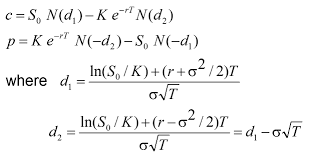

C : call option price

P : Put option price

S : Stock price

K : Strike price

r : risk free rate

t : time of maturity in year

N = Normal distribution

In [42]:
def Norm(d):
    return 0.5 * (1 + ss.norm.cdf(d / (2**0.5)))

def euro_vanilla(S, K, T, r, sigma, option = 'call'):
    """
    To calculate options price with the help of black-scholes model

    Parameters
    ----------
    S : float
        The price of the underlying

    K : float
        Strike price of the option

    T : float
        Time to expiry in years

    r : float
        Risk free rate which can be taken as the US Treasury bond yield

    sigma : float
        The annual volatility of the returns

    option : string
        call for call option
        put for put option

    Returns
    -------
    premium : float
        The price of call or put option
    """

    d1=(np.log(S/K)+(r+(sigma**2)/2)*T)/(sigma*(T**0.5));
    d2=(np.log(S/K)+(r-(sigma**2)/2)*T)/(sigma*(T**0.5));

    if(option=='call'):
      return (S*Norm(d1)-K*np.exp(-r*T)*Norm(d2))
    elif(option=='put'):
      return (K*np.exp(-r*T)*Norm(-1*d2)-S*Norm(-1*d1))





   #your code here

In [43]:
expiration_date_str = dfo.options[1]

expiration_year = int(expiration_date_str[:4])
expiration_month = int(expiration_date_str[5:7])
expiration_day = int(expiration_date_str[8:10])

today = date.today()

N = 100
T = ((date(expiration_year, expiration_month, expiration_day) - today).days)/365
t = T/N

In [44]:
#r is the risk free rate taken from the 10 years us treasury bond
#call price calculated from black scholes model
call = {}
for K in dfo_exp.calls['strike']:
    call_price = euro_vanilla(S = df['Close'][len(df)-1], K = K, T = T, r=0.0123*t, sigma=vol,option='call')
    print(call_price)
    call[K] = call_price
th_call = pd.DataFrame.from_dict(call, orient='index')
th_call.rename(columns = {0:"th_call"}, inplace = True)
th_call.head()

3581.5800792329
3381.58007941755
3181.5800796022004
2981.5800797868505
2781.5800799715003
2581.5800801561504
2381.5800803408
2181.5800805254503
1981.5800807101004
1781.5800808947506
1581.5800810794003
1381.5800812640505
1281.5800813563756
1181.5800814487006
1081.5800815410257
981.5800816333503
831.5800817718382
781.5800818180005
581.5800820026507
531.580082048813
506.58008207189414
481.5800820949753
456.58008211805645
451.58008212267305
441.58008213190533
431.5800821411385
421.5800821503708
411.5800821596031
406.5800821642197
401.58008216883536
391.58008217806855
381.58008218730083
371.5800821965331
366.5800822011497
361.5800822057654
356.580082210382
351.5800822149986
346.58008221961427
341.58008222423086
331.5800822334613
321.58008224268815
311.58008225188405
306.58008225644335
301.5800822609326
296.5800822652682
291.5800822692754
286.5800822725914
281.5800822744659
276.58008227339815
271.5800822664005
266.58008224763944
261.58008220589
256.58008211991
251.58008195011735
246.58008162

,th_call
1200.0,3581.580079
1400.0,3381.580079
1600.0,3181.580080
1800.0,2981.580080
2000.0,2781.580080


In [45]:
#actual call price
ac_call = dfo_exp.calls.loc[:, ['strike', 'lastPrice']]
ac_call.set_index('strike', inplace = True)
ac_call.rename(columns = {"lastPrice":"ac_call"}, inplace=True)
ac_call.head()

,ac_call
strike,
1200.0,3574.69
1400.0,3371.81
1600.0,3175.40
1800.0,2950.78
2000.0,2756.09


In [46]:
call = th_call
call["ac_call"] = ac_call
call.head(10)

,th_call,ac_call
1200.0,3581.580079,3574.69
1400.0,3381.580079,3371.81
1600.0,3181.580080,3175.40
1800.0,2981.580080,2950.78
2000.0,2781.580080,2756.09
2200.0,2581.580080,2575.74
2400.0,2381.580080,2373.01
2600.0,2181.580081,2161.83
2800.0,1981.580081,1957.99
3000.0,1781.580081,1781.95


<Axes: >

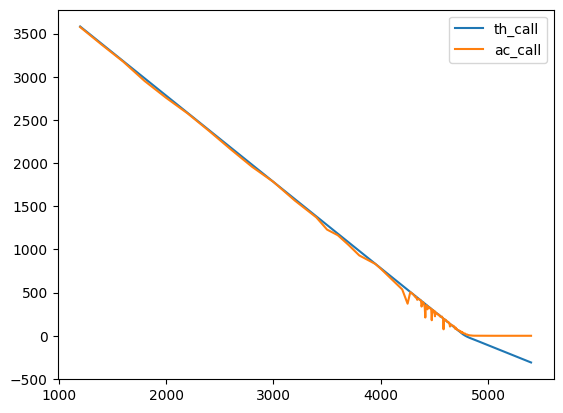

In [47]:
call.plot() #plotting the actual and theoretical call prices

In [48]:
#r is the risk free rate taken from the 10 years us treasury bond
#theoretical put price calculated from black scholes model
put = {}
for K in dfo_exp.puts['strike']:
    put_price = euro_vanilla(S = df['Close'][len(df)-1], K = K, T = T, r=0.0158*t, sigma=vol, option = 'put')
  # print(put_price)
    put[K] = put_price
th_put = pd.DataFrame.from_dict(put, orient='index')
th_put.rename(columns = {0:"th_put"}, inplace = True)
th_put.head()

,th_put
2400.0,-1190.790040
2600.0,-1090.790041
2800.0,-990.790041
3000.0,-890.790041
3200.0,-790.790041


In [49]:
#actual put price
ac_put = dfo_exp.puts.loc[:, ['strike', 'lastPrice']]
ac_put.set_index('strike', inplace = True)
ac_put.rename(columns = {"lastPrice":"ac_put"}, inplace=True)
ac_put.head()

,ac_put
strike,
2400.0,0.07
2600.0,0.05
2800.0,0.05
3000.0,0.05
3200.0,0.05


In [50]:
put = th_put
put["ac_put"] = ac_put
put.tail(10)

,th_put,ac_put
4900.0,118.292218,148.30
4920.0,138.379178,128.55
4930.0,148.398559,152.33
4950.0,168.414827,166.38
5000.0,218.419852,222.71
5100.0,318.419916,338.79
5200.0,418.419916,470.36
5600.0,818.419915,825.01
5800.0,1018.419915,1066.77
6000.0,1218.419915,1224.01


<Axes: >

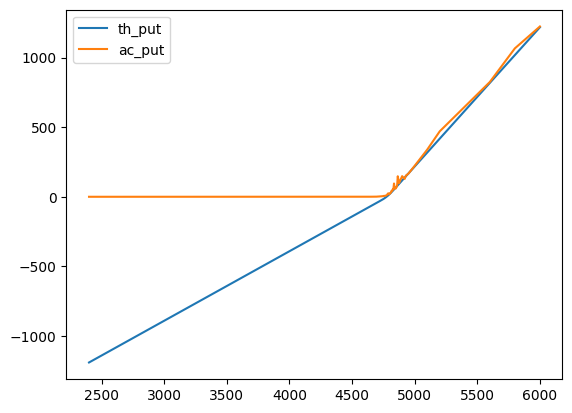

In [51]:
put.plot()